Copyright (c) 2019 OERCompBiomed (UiB)

# SciPy

The [**SciPy**](https://scipy.org) library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration, interpolation, optimization, linear algebra, statistics and sparse matrices.

**You are encouraged to experiment with all our code!**

NOTE: The original notebook on Github might change over the time, and we recommend that you make a copy of our notebooks before you are editing them. In this respect you might adopt the naming convention my_<'name_of_notebook'>.ipynb, e.g. my_1.4-scipy-basics.ipynb

### Essential Libraries and Tools

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Versions:

In [3]:
print("NumPy version:", np.__version__)
print("pandas version:", pd.__version__)

import sys
print("Python version:", sys.version)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

NumPy version: 1.16.4
pandas version: 0.25.0
Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
matplotlib version: 3.1.0
SciPy version: 1.3.0
IPython version: 7.7.0


**Kernels**

If you're using the Jupyter notebook, you can change your kernel at any time using the _Kernel → Choose Kernel_ menu item.

To see the kernels you have available on your system, you can run the following command in the shell:

In [4]:
!jupyter kernelspec list

Available kernels:
  bmed360           C:\Users\arvid\AppData\Roaming\jupyter\kernels\bmed360
  braingut          C:\Users\arvid\AppData\Roaming\jupyter\kernels\braingut
  cbm101            C:\Users\arvid\AppData\Roaming\jupyter\kernels\cbm101
  dat158            C:\Users\arvid\AppData\Roaming\jupyter\kernels\dat158
  elmed219          C:\Users\arvid\AppData\Roaming\jupyter\kernels\elmed219
  fastai            C:\Users\arvid\AppData\Roaming\jupyter\kernels\fastai
  gbm               C:\Users\arvid\AppData\Roaming\jupyter\kernels\gbm
  handson-ml-med    C:\Users\arvid\AppData\Roaming\jupyter\kernels\handson-ml-med
  ir                C:\Users\arvid\AppData\Roaming\jupyter\kernels\ir
  lvv-ri            C:\Users\arvid\AppData\Roaming\jupyter\kernels\lvv-ri
  mlbook2           C:\Users\arvid\AppData\Roaming\jupyter\kernels\mlbook2
  pdsh              C:\Users\arvid\AppData\Roaming\jupyter\kernels\pdsh
  python3           C:\Users\arvid\AppData\Roaming\jupyter\kernels\python3
  pytorch    

Recall that the python in your path can be determined using

In [5]:
!type python

The system cannot find the file specified.


# SciPy and statistics

### Probability Density Functions (PDFs)

Adapted from https://github.com/rasbt/data-science-tutorial

**Normal Distribution (Gaussian Distribution)**

- unimodal and symmetric
- many algorithms in machine learning & statistics have normality assumptions
- two parameters: mean (center of the peak) and standard deviation (spread); $N(\mu, \sigma)$
- we can estimate parameters of $N(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$)
- univariate Normal distribution:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$



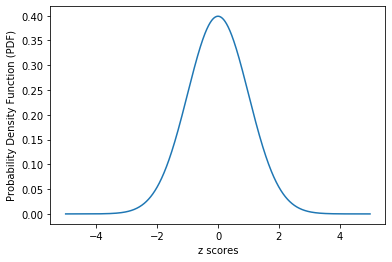

In [6]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

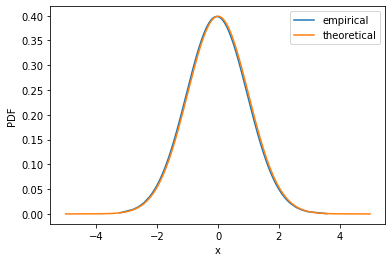

In [7]:
sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

def empirical_pdf(sample):
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    sample_sorted = np.sort(sample)
    sample_pdf = univariate_gaussian_pdf(sample_sorted, 
                                     sample_mean, 
                                     sample_variance)
    return sample_sorted, sample_pdf

sample_sorted, sample_pdf = empirical_pdf(sample)
plt.plot(sample_sorted, sample_pdf, label='empirical')
plt.plot(x, y, label='theoretical')
plt.ylabel('PDF')
plt.xlabel('x')
plt.legend()
plt.show()

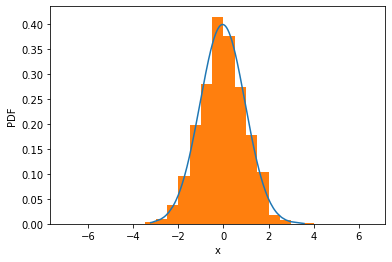

In [8]:
plt.plot(sample_sorted, sample_pdf)
plt.hist(sample_sorted, density=True, 
         bins=np.arange(-7, 7, 0.5))
plt.ylabel('PDF')
plt.xlabel('x')
plt.show()

### Cumulative Distribution Function (CDF)

CDF of the normal distribution:

$$F(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(t-\mu)^2}{2\sigma^2}\Big) dt$$



In [9]:
from scipy.integrate import quad


def gaussian_cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2.*np.pi*variance)) * 
                 np.exp(-(t - mean)**2 / (2.*variance)))


def gaussian_cdf(x, mean, variance):

    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(gaussian_cdf_helper, 
                      -np.inf, 
                      val, 
                      args=(mean, variance))[0])
        out.append(integ)
    return out

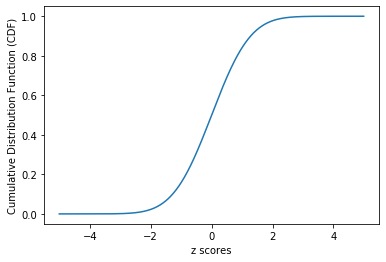

In [10]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)

y = gaussian_cdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

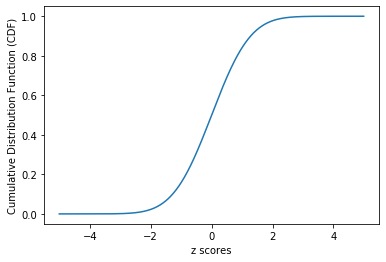

In [11]:
y = stats.norm.cdf(x)

plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

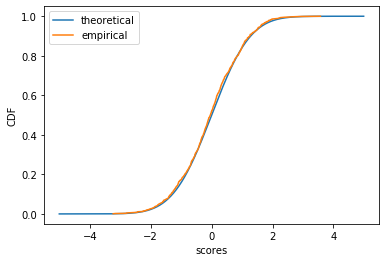

In [12]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y


sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

sample_sorted, sample_cdf = empirical_cdf(sample)
plt.plot(x, y, label='theoretical')
plt.plot(sample_sorted, sample_cdf, label='empirical')
plt.ylabel('CDF')
plt.xlabel('scores')
plt.legend()
plt.show()

### Exponential Distribution

**Probability Density Function of the Exponential Distribution**

- has only 1 parameter, the rate parameter $\lambda$ (the "mean waiting time," $\lambda > 0$)
- describes the time between events in a [Poisson process](https://en.wikipedia.org/wiki/Poisson_point_process) 
- note that the Poisson distribution can be derived from both the binomial and the exponential distribution
- the exponential pdf is used to model waiting times between any two events from a poisson process; the exponential distribution is continuous
- the poisson pdf models the probability of *k* hits in a given time interval; the poisson distribution is discrete

$$f(x; \lambda) = \begin{cases} 
      e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

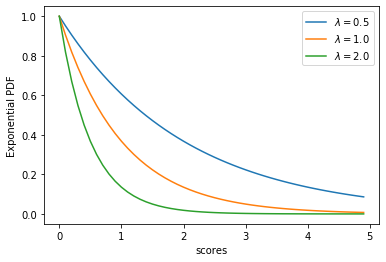

In [13]:
def univariate_exponential_pdf(x, lambda_):
    return np.where(x >= 0, np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_pdf(x, lambda_=.5)
y_1 = univariate_exponential_pdf(x, lambda_=1.)
y_2 = univariate_exponential_pdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential PDF')
plt.legend(loc = 'upper right')
plt.show()

Text(0, 0.5, 'Exponential PDF')

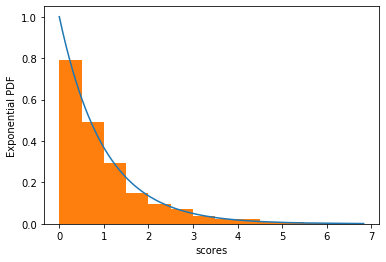

In [14]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.pdf(x_sample)

plt.plot(x_sample, y_sample)
plt.hist(x_sample, density=True, bins=np.arange(0, 7, 0.5))
plt.xlabel('scores')
plt.ylabel('Exponential PDF')

### Cumulative Distribution Function of the Exponential Distribution

$$F(x; \lambda) = \begin{cases} 
      1 - e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

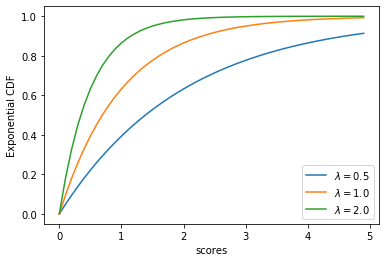

In [15]:
def univariate_exponential_cdf(x, lambda_):
    return np.where(x >= 0, 1 - np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_cdf(x, lambda_=.5)
y_1 = univariate_exponential_cdf(x, lambda_=1.)
y_2 = univariate_exponential_cdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.legend(loc = 'lower right')
plt.show()

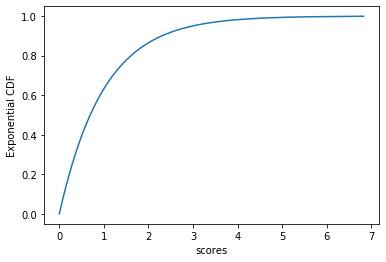

In [16]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.cdf(x_sample)

plt.plot(x_sample, y_sample)
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.show()

# SciPy and sparse matrices

In numerical analysis and scientific computing, a [**sparse matrix**](https://en.wikipedia.org/wiki/Sparse_matrix) or sparse array is a matrix in which most of the elements are zero.  By contrast, if most of the elements are nonzero, then the matrix is considered **dense**. Conceptually, sparsity corresponds to systems with few pairwise interactions. When storing and manipulating sparse matrices on a computer, it is beneficial and often necessary to use specialized algorithms and data structures that take advantage of the sparse structure of the matrix. Operations using standard dense-matrix structures and algorithms are slow and inefficient when applied to large sparse matrices as processing and memory are wasted on the zeroes. Sparse data is by nature more easily compressed and thus requires significantly less storage. Some very large sparse matrices are infeasible to manipulate using standard dense-matrix algorithms. In SciPy there are several *sparse matrix representations*, e.g.

**CSR** stands for [**compressed sparse row**](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29) and is good for implementing fast arithmetic operations as well as slicing by row. It's more complicated than the previous examples and it can be used to take better advantage of the sparse structure.

**COO** representation is just an abbreviation of [coordinate](https://en.wikipedia.org/wiki/Sparse_matrix#Coordinate_list_.28COO.29), and the format itself is quite comprehensible. COO stores a list of (row, column, value) tuples. Ideally, the entries are sorted first by row index and then by column index, to improve random access times.

See also the [blog](http://heydenberk.com/blog/posts/sparse-matrix-representations-in-scipy) by Eric Heydenberk.

In [17]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("\nNumPy array for CSR:\n", eye)

# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)

m = np.matrix([
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 1, 0, 1, 0]
])
print("\nNumPy array for COO:\n", m)
mat_coo = sparse.coo_matrix(m)
print("\nCOO representation:\n", mat_coo)


NumPy array for CSR:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0

NumPy array for COO:
 [[0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 1]
 [0 1 0 1 0]]

COO representation:
   (0, 3)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 1)	1
  (4, 3)	1
